# Laboratorio de data mining


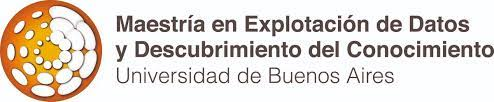

Vamos a usar el dataset de https://archive.ics.uci.edu/ml/datasets/wiki4he, que son dos encuentas de uso de Wikipedia en distintas universidades

## Atributos
Attribute Information

Additional Information

AGE: numeric

GENDER: 0=Male; 1=Female

DOMAIN: 1=Arts & Humanities; 2=Sciences; 3=Health Sciences; 4=Engineering & Architecture; 5=Law & Politics

PhD: 0=No; 1=Yes

YEARSEXP (years of university teaching experience): numeric

UNIVERSITY: 1=UOC; 2=UPF

UOC_POSITION (academic position of UOC members): 1=Professor; 2=Associate; 3=Assistant; 4=Lecturer; 5=Instructor; 6=Adjunct

OTHER (main job in another university for part-time members): 1=Yes; 2=No

OTHER_POSITION (work as part-time in another university and UPF members): 1=Professor; 2=Associate; 3=Assistant; 4=Lecturer; 5=Instructor; 6=Adjunct

USERWIKI (Wikipedia registered user): 0=No; 1=Yes



The following survey items are Likert scale (1-5) ranging from strongly disagree / never (1) to strongly agree / always (5)



Perceived Usefulness

PU1: The use of Wikipedia makes it easier for students to develop new skills

PU2: The use of Wikipedia improves students' learning

PU3: Wikipedia is useful for teaching



Perceived Ease of Use

PEU1: Wikipedia is user-friendly

PEU2: It is easy to find in Wikipedia the information you seek

PEU3: It is easy to add or edit information in Wikipedia



Perceived Enjoyment

ENJ1: The use of Wikipedia stimulates curiosity

ENJ2: The use of Wikipedia is entertaining



Quality

QU1: Articles in Wikipedia are reliable

QU2: Articles in Wikipedia are updated

QU3: Articles in Wikipedia are comprehensive

QU4: In my area of expertise, Wikipedia has a lower quality than other educational resources

QU5: I trust in the editing system of Wikipedia



Visibility

VIS1: Wikipedia improves visibility of students' work

VIS2: It is easy to have a record of the contributions made in Wikipedia

VIS3: I cite Wikipedia in my academic papers



Social Image

IM1: The use of Wikipedia is well considered among colleagues

IM2: In academia, sharing open educational resources is appreciated

IM3: My colleagues use Wikipedia



Sharing attitude

SA1: It is important to share academic content in open platforms

SA2: It is important to publish research results in other media than academic journals or books

SA3: It is important that students become familiar with online collaborative environments



Use behaviour

USE1: I use Wikipedia to develop my teaching materials

USE2: I use Wikipedia as a platform to develop educational activities with students

USE3: I recommend my students to use Wikipedia

USE4: I recommend my colleagues to use Wikipedia

USE5: I agree my students use Wikipedia in my courses



Profile 2.0

PF1: I contribute to blogs

PF2: I actively participate in social networks

PF3: I publish academic content in open platforms



Job relevance

JR1: My university promotes the use of open collaborative environments in the Internet

JR2: My university considers the use of open collaborative environments in the Internet as a teaching merit



Behavioral intention

BI1: In the future I will recommend the use of Wikipedia to my colleagues and students

BI2: In the future I will use Wikipedia in my teaching activity



Incentives

INC1: To design educational activities using Wikipedia, it would be helpful: a best practices guide

INC2: To design educational activities using Wikipedia, it would be helpful: getting instruction from a colleague

INC3: To design educational activities using Wikipedia, it would be helpful: getting specific training

INC4: To design educational activities using Wikipedia, it would be helpfull: greater institutional recognition



Experience

EXP1: I consult Wikipedia for issues related to my field of expertise

EXP2: I consult Wikipedia for other academic related issues

EXP3: I consult Wikipedia for personal issues

EXP4: I contribute to Wikipedia (editions, revisions, articles improvement...)

EXP5: I use wikis to work with my students


In [ ]:
try:
    np.abs(1)
    firstrun = False
except:
    firstrun= True
firstrun

True

In [ ]:
if (firstrun):
  # Gráficos
  import matplotlib.pyplot as plt
  #import matplotlib as mpl
  plt.rcParams['figure.figsize'] = (8,6)
  plt.rcParams['font.size'] = 16

  #from IPython.display import Audio, Markdown, Image
  import seaborn as sns

  # Números y Datos
  import numpy as np
  import pandas as pd

  # Archivos
  import urllib.request
  import glob

  # Clustering
  from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
if (firstrun):
    if('google.colab' in str(get_ipython() ) ):
        environment= 'google'
    else:
        import os
        if (os.environ.get('PWD')=='/kaggle/working'):
            environment= 'kaggle'
        else:
            environment= 'local'
    print(environment)

google


In [ ]:
if (firstrun):
    if( environment== 'local' ):
        DIR = '/home/vbettachini/documents/universitet/FCEyN/maestríaDatos/cienciaTecnología/'

    elif( ( environment== 'google' ) ):
        from google.colab import drive
        drive.mount('/content/drive')
        DIR = "/content/drive/MyDrive/maestría/cienciaTecnología/"

    elif( ( environment== 'kaggle' ) )  :
        a= 1

    data_path = DIR + 'clase02/'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(data_path + 'wiki4he.zip',sep=';')
df.head()

,AGE,GENDER,DOMAIN,PhD,YEARSEXP,UNIVERSITY,UOC_POSITION,OTHER_POSITION,OTHERSTATUS,USERWIKI,...,BI2,Inc1,Inc2,Inc3,Inc4,Exp1,Exp2,Exp3,Exp4,Exp5
0,40,0,2,1,14,1,2,?,?,0,...,3,5,5,5,5,4,4,4,1,2
1,42,0,5,1,18,1,2,?,?,0,...,2,4,4,3,4,2,2,4,2,4
2,37,0,4,1,13,1,3,?,?,0,...,1,5,3,5,5,2,2,2,1,3
3,40,0,4,0,13,1,3,?,?,0,...,3,3,4,4,3,4,4,3,3,4
4,51,0,6,0,8,1,3,?,?,1,...,5,5,5,4,4,5,5,5,4,4


In [ ]:
df.shape

(913, 53)

In [ ]:
df.columns

Index(['AGE', 'GENDER', 'DOMAIN', 'PhD', 'YEARSEXP', 'UNIVERSITY',
       'UOC_POSITION', 'OTHER_POSITION', 'OTHERSTATUS', 'USERWIKI', 'PU1',
       'PU2', 'PU3', 'PEU1', 'PEU2', 'PEU3', 'ENJ1', 'ENJ2', 'Qu1', 'Qu2',
       'Qu3', 'Qu4', 'Qu5', 'Vis1', 'Vis2', 'Vis3', 'Im1', 'Im2', 'Im3', 'SA1',
       'SA2', 'SA3', 'Use1', 'Use2', 'Use3', 'Use4', 'Use5', 'Pf1', 'Pf2',
       'Pf3', 'JR1', 'JR2', 'BI1', 'BI2', 'Inc1', 'Inc2', 'Inc3', 'Inc4',
       'Exp1', 'Exp2', 'Exp3', 'Exp4', 'Exp5'],
      dtype='object')

In [ ]:
df.describe()

,AGE,GENDER,PhD,UNIVERSITY
count,913.000000,913.000000,913.000000,913.000000
mean,42.246440,0.424973,0.464403,1.123768
std,8.058418,0.494610,0.499005,0.329497
min,23.000000,0.000000,0.000000,1.000000
25%,36.000000,0.000000,0.000000,1.000000
50%,42.000000,0.000000,0.000000,1.000000
75%,47.000000,1.000000,1.000000,1.000000
max,69.000000,1.000000,1.000000,2.000000


# Limpieza y preparación de los datos

## Datos faltantes
Primero revisamos como están codificados los datos faltantes, y encontramos que se uso el signo de pregunta (podrían estar codificados de distintas formas).

Podemos primero explorar cuántos datos faltantes hay por columna. Recuerden que hay ~900 registros.

In [ ]:
df.apply(lambda x: np.sum(x=='?'))

AGE                 0
GENDER              0
DOMAIN              2
PhD                 0
YEARSEXP           23
UNIVERSITY          0
UOC_POSITION      113
OTHER_POSITION    261
OTHERSTATUS       540
USERWIKI            4
PU1                 7
PU2                11
PU3                 5
PEU1                4
PEU2               14
PEU3               97
ENJ1                7
ENJ2               17
Qu1                 7
Qu2                10
Qu3                15
Qu4                22
Qu5                29
Vis1               72
Vis2              117
Vis3                8
Im1                22
Im2                20
Im3                57
SA1                11
SA2                12
SA3                11
Use1               14
Use2               17
Use3                9
Use4               23
Use5               15
Pf1                11
Pf2                 6
Pf3                14
JR1                27
JR2                53
BI1                32
BI2                43
Inc1               35
Inc2      

In [ ]:
df.OTHERSTATUS

0      ?
1      ?
2      ?
3      ?
4      ?
      ..
908    2
909    6
910    4
911    2
912    2
Name: OTHERSTATUS, Length: 913, dtype: object

Luego, podemos explorar si todos los datos faltantes están en algunas filas en particular. Recuerden que hay ~50 columnas.

<Axes: >

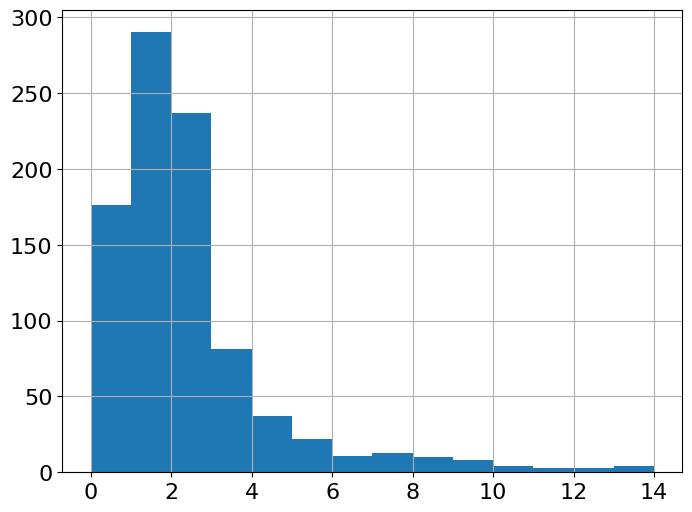

In [ ]:
df.apply(lambda x: np.sum(x=='?'),axis=1).hist(bins=range(0,15))

Finalmente, podemos ver cuántos datos hay sin ningún dato faltante.

In [ ]:
print('Hay %d registros sin datos faltantes.'%sum(df.apply(lambda x: np.sum(x=='?'),axis=1)==0))

Hay 176 registros sin datos faltantes.


Hay pocas variables que concentran muchos valores faltantes. Para simplificar el análisis no vamos a aplicar técnicas de imputación de datos faltantes, pero haremos algunos cambios en el dataset.

La variable OTHER_POSITION sólo tiene sentido para los docentes que tienen otra posición además de la que tienen en UOC.
Las preguntas Vis2 y Peu3 solo deberían ser respondidos por quienes editan artículos en Wikipedia, o conocen a alguien que lo haga.
Podemos eliminar estas variables.

In [ ]:
df = df.drop(columns=['OTHER_POSITION','Vis2','PEU3'])
print('Hay %d registros sin datos faltantes.'%sum(df.apply(lambda x: np.sum(x=='?'),axis=1)==0))

Hay 188 registros sin datos faltantes.


In [ ]:
#df2 = df.drop(columns=['OTHERSTATUS'])
#print('Hay %d registros sin datos faltantes.'%sum(df2.apply(lambda x: np.sum(x=='?'),axis=1)==0))

En una situación de trabajo real, habría que continuar el análisis de los datos faltantes, y considerar aplicar alguna ténica de imputación de datos faltantes. Nosotros nos vamos a quedar con los registros completos.
Vamos a separar los datos profesionales y demográficos de los encuestados.

In [ ]:
df = df[df.apply(lambda x: np.sum(x=='?'),axis=1)==0]
print(len(df))

188


In [ ]:
campos_meta = ['AGE', 'GENDER', 'DOMAIN', 'PhD', 'YEARSEXP', 'UNIVERSITY',
                                       'UOC_POSITION', 'OTHERSTATUS', 'USERWIKI']
meta = df[campos_meta]
encu = df.drop(columns=campos_meta)

# Metadata
Arrancamos con los datos de los encuestados

## Limpieza y preparación de los datos
Vamos a corregir las categorias (en el caso que corresponda) y el tipo de datos (Numerico, Booleano o logico, y Categorico)

In [ ]:
meta.apply(lambda x: type(x.values[1]),axis=0)

AGE             <class 'numpy.int64'>
GENDER          <class 'numpy.int64'>
DOMAIN                  <class 'str'>
PhD             <class 'numpy.int64'>
YEARSEXP                <class 'str'>
UNIVERSITY      <class 'numpy.int64'>
UOC_POSITION            <class 'str'>
OTHERSTATUS             <class 'str'>
USERWIKI                <class 'str'>
dtype: object

Las edades son números enteros... ok

Hay otras dos variables que deberían estar codificadas como de tipo lógico, PhD y USERWIKI. Las siguientes variables deberían ser de tipo factor: GENDER, DOMAIN, UOC_POSITION, UNIVERSITY y OTHERSTATUS.

Estas conversiones son importantes para evitar más adelante calcular, por ejemplo, distancias Euclídeas entre sexos o entre dominios de trabajo. En algunos casos, y para aumentar la claridad vamos a especificar los niveles de estas variables.

In [ ]:
meta.loc[:,'GENDER'].replace([0,1],['M','F'], inplace=True)
meta.loc[:,'UNIVERSITY'].replace([1,2],['UOC', 'UPF'],inplace=True)
meta.loc[:,'GENDER'].replace([0,1],['M','F'], inplace=True)
meta.loc[:,'UNIVERSITY'].replace([1,2],['UOC', 'UPF'],inplace=True)
meta.loc[:,'PhD'].replace([0,1],['N','Y'], inplace=True)
meta.loc[:,'USERWIKI'].replace([0,1],['N','Y'], inplace=True)
#meta['PhD']=meta['PhD'].astype('bool')
#meta['USERWIKI']=meta['USERWIKI'].astype('bool')
meta.apply(lambda x: type(x.values[1]),axis=0)

<ipython-input-18-4bd29ab75019>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta.loc[:,'GENDER'].replace([0,1],['M','F'], inplace=True)
<ipython-input-18-4bd29ab75019>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta.loc[:,'UNIVERSITY'].replace([1,2],['UOC', 'UPF'],inplace=True)
<ipython-input-18-4bd29ab75019>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta.loc[:,'GENDER'].replace([0,1],['M','F'], inplace=True)
<ipython

AGE             <class 'numpy.int64'>
GENDER                  <class 'str'>
DOMAIN                  <class 'str'>
PhD                     <class 'str'>
YEARSEXP                <class 'str'>
UNIVERSITY              <class 'str'>
UOC_POSITION            <class 'str'>
OTHERSTATUS             <class 'str'>
USERWIKI                <class 'str'>
dtype: object

Al resto de las variables tengo que acomodarles las categorias. Ya no tiene datos faltantes, si no se lo agrego como una categoria más.

In [ ]:
meta.loc[:,'DOMAIN'].replace(['1','2','3','4','5','6'],
                           ['Arts_Humanities','Sciences','Health_Sciences','Engineering_Architecture','Law','Political_Sciences'],
                           inplace=True)
meta.apply(lambda x: type(x.values[1]),axis=0)
#meta['DOMAIN'].unique()

<ipython-input-19-9842d0b46d06>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta.loc[:,'DOMAIN'].replace(['1','2','3','4','5','6'],


AGE             <class 'numpy.int64'>
GENDER                  <class 'str'>
DOMAIN                  <class 'str'>
PhD                     <class 'str'>
YEARSEXP                <class 'str'>
UNIVERSITY              <class 'str'>
UOC_POSITION            <class 'str'>
OTHERSTATUS             <class 'str'>
USERWIKI                <class 'str'>
dtype: object

In [ ]:
meta.loc[:,'UOC_POSITION'].replace(['1','2','3','4','5','6'],
                           ['Professor','Associate','Assistant','Lecturer','Instructor','Adjunct'],
                           inplace=True)
meta.apply(lambda x: type(x.values[1]),axis=0)
#meta['UOC_POSITION'].unique()

<ipython-input-20-cc6a1a884f18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta.loc[:,'UOC_POSITION'].replace(['1','2','3','4','5','6'],


AGE             <class 'numpy.int64'>
GENDER                  <class 'str'>
DOMAIN                  <class 'str'>
PhD                     <class 'str'>
YEARSEXP                <class 'str'>
UNIVERSITY              <class 'str'>
UOC_POSITION            <class 'str'>
OTHERSTATUS             <class 'str'>
USERWIKI                <class 'str'>
dtype: object

Remuevo las variables que no van a servir para discriminar grupos porque tienen un único valor sobre el conjunto de registros que están completos.

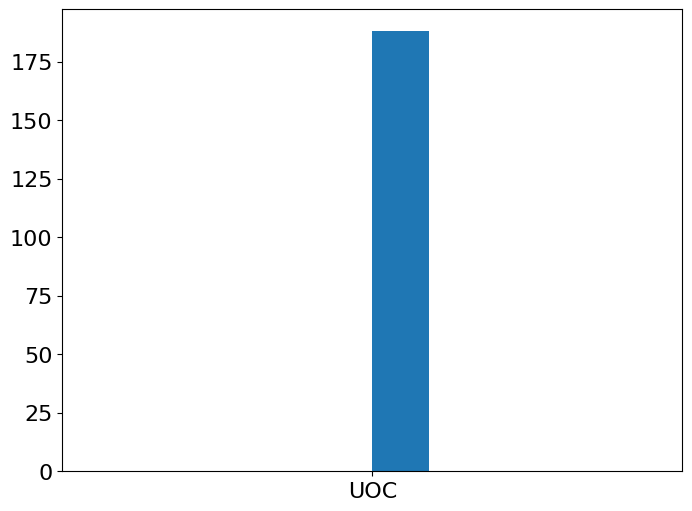

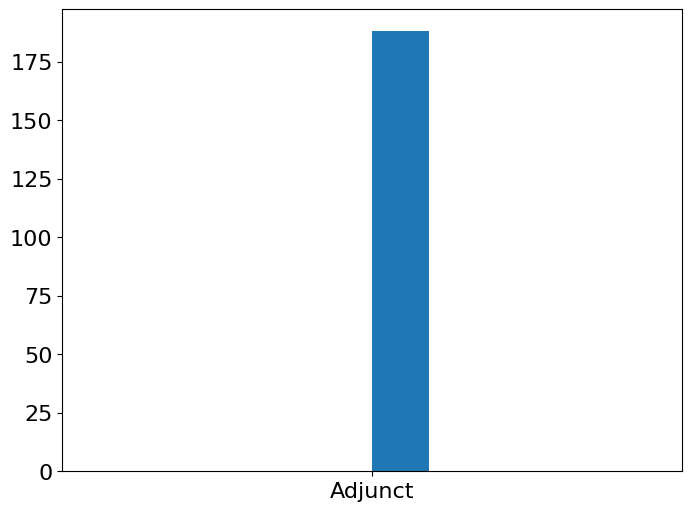

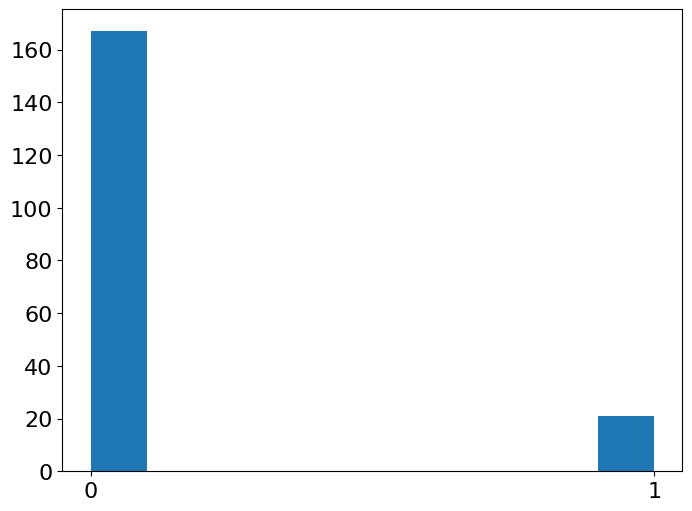

In [ ]:
plt.hist(meta.UNIVERSITY)
plt.show()
plt.hist(meta.UOC_POSITION)
plt.show()
plt.hist(meta.USERWIKI)
plt.show()

In [ ]:
meta = meta.drop(columns=['UNIVERSITY','UOC_POSITION','USERWIKI'])

In [ ]:
meta.apply(lambda x: type(x.values[1]),axis=0)

AGE            <class 'numpy.int64'>
GENDER                 <class 'str'>
DOMAIN                 <class 'str'>
PhD                    <class 'str'>
YEARSEXP               <class 'str'>
OTHERSTATUS            <class 'str'>
dtype: object

## Análisis
Vamos a construir una matriz de distancias de Gower (https://pypi.org/project/gower/) para los datos personales, y realizamos un cluster jerárquico para tener una primera impresión sobre cómo se agrupan los datos.

In [ ]:
if (firstrun):
    try:
        import gower
    except:
        ! pip install gower
        import gower

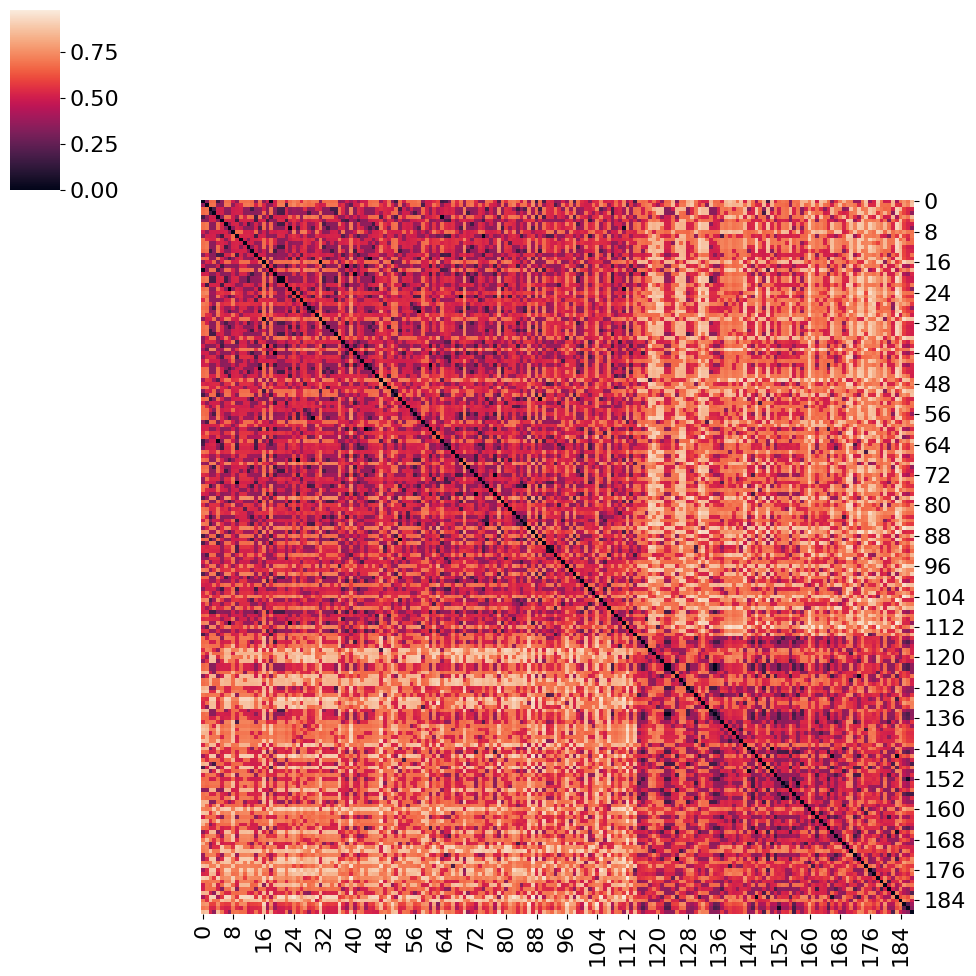

In [ ]:
d_meta = gower.gower_matrix(meta)
sns.clustermap(d_meta,row_cluster=False,col_cluster=False)

#### ¿Qué se puede decir de la presencia de grupos en el dataset?

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


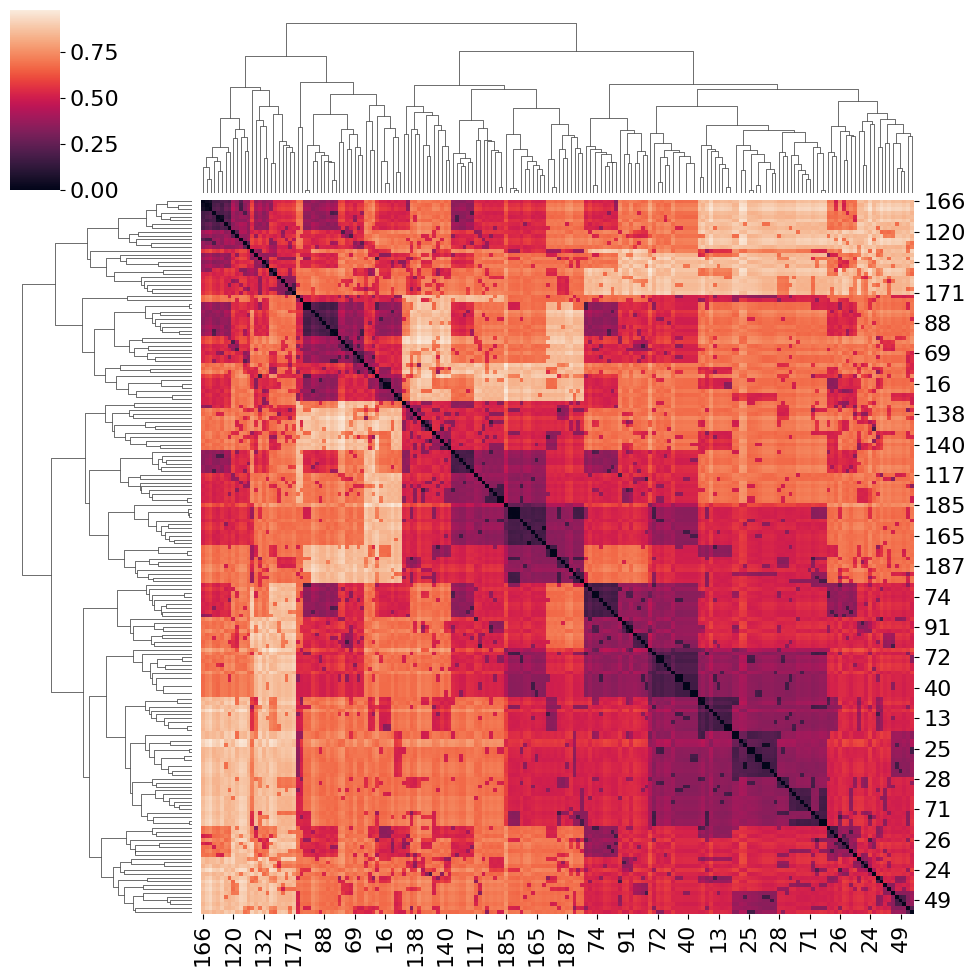

In [ ]:
sns.clustermap(d_meta)

#### Jerarquico


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import squareform

<ipython-input-28-a13de8fe9a05>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(d_meta, 'ward')


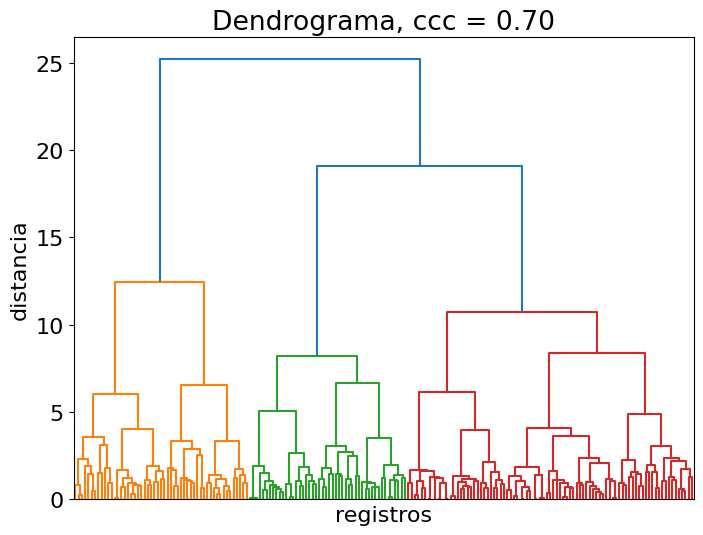

In [ ]:
Z = linkage(d_meta, 'ward')
c,_=cophenet(Z,Y=squareform(d_meta))
plt.title('Dendrograma, ccc = %0.2f'%c)
plt.xlabel('registros')
plt.ylabel('distancia')
dn = dendrogram(Z,no_labels=True)

In [ ]:
dn['leaves']

[50,
 16,
 31,
 47,
 86,
 36,
 96,
 8,
 59,
 104,
 101,
 107,
 4,
 63,
 78,
 98,
 51,
 0,
 18,
 88,
 90,
 69,
 93,
 114,
 1,
 58,
 39,
 112,
 180,
 118,
 132,
 143,
 127,
 184,
 119,
 126,
 171,
 170,
 160,
 174,
 121,
 155,
 166,
 146,
 183,
 149,
 125,
 173,
 120,
 133,
 131,
 176,
 177,
 122,
 123,
 135,
 185,
 156,
 186,
 145,
 116,
 165,
 136,
 152,
 169,
 144,
 150,
 148,
 182,
 187,
 129,
 158,
 128,
 134,
 161,
 140,
 163,
 159,
 164,
 124,
 138,
 178,
 142,
 139,
 175,
 141,
 168,
 137,
 162,
 181,
 167,
 151,
 172,
 117,
 147,
 153,
 157,
 115,
 130,
 154,
 179,
 62,
 113,
 72,
 77,
 67,
 100,
 17,
 38,
 108,
 19,
 40,
 43,
 60,
 9,
 74,
 5,
 41,
 64,
 65,
 102,
 14,
 37,
 48,
 91,
 92,
 110,
 80,
 94,
 22,
 53,
 87,
 111,
 15,
 44,
 7,
 23,
 33,
 79,
 29,
 57,
 25,
 68,
 75,
 85,
 105,
 2,
 83,
 52,
 89,
 13,
 34,
 28,
 56,
 70,
 32,
 99,
 12,
 45,
 6,
 71,
 3,
 35,
 20,
 21,
 84,
 95,
 106,
 42,
 103,
 26,
 61,
 73,
 24,
 66,
 97,
 27,
 55,
 54,
 82,
 76,
 10,
 30,
 46,
 49

#### PAM
Para agrupar los datos datos vamos a usar el método PAM, y como desconocemos el mejor valor de K a utilizar, vamos a probar varios y después usar los gráficos de SSE vs. k y Silhouette vs. k.
En el loop de más abajo se recorren los valores de k desde 2 hasta el máximo número de k (cantidad de clusters) que se van a probar. En cada iteración se calcula un nuevo PAM y con sus medoides se calcula el SSE y Silhouette.

In [ ]:
if (firstrun):
    try:
        from sklearn_extra.cluster import KMedoids
        from sklearn.metrics import silhouette_samples, silhouette_score
    except:
        !pip install scikit-learn-extra
        from sklearn_extra.cluster import KMedoids
        from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
def calcula_sse_kmedoids(KM,d):
  se = []
  for i in range(0, KM.n_clusters):
    se.append(sum(d[KM.medoid_indices_[i], KM.labels_==i]**2))
  return sum(se)

In [ ]:
KM_meta= KMedoids(n_clusters = 4, metric = 'precomputed', init = 'k-medoids++').fit(d_meta)

In [ ]:
print(KM_meta.labels_)
print(KM_meta.medoid_indices_)

[2 2 2 2 2 2 2 2 3 1 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 3 3 2 2 2 2
 2 2 2 2 1 2 2 2 2 2 2 0 2 2 2 2 2 3 0 2 2 2 2 2 0 2 2 1 2 0 2 2 2 2 2 2 1
 1 3 2 2 1 2 2 0 2 3 1 3 0 2 2 3 2 1 2 2 2 2 1 0 1 2 2 3 2 0 0 2 3 3 2 2 2
 2 2 2 2 3 3 1 1 3 1 1 2 2 2 1 3 0 3 3 1 1 1 1 2 2 3 1 0 1 3 1 1 1 3 3 1 1
 3 1 3 1 3 1 1 1 2 1 3 3 3 3 1 3 3 3 1 1 1 3 3 3 1 1 3 1 1 1 0 1 1 1 3 1 3
 2 2 3]
[ 27 137 108 169]


In [ ]:
print(silhouette_score(d_meta, KM_meta.labels_,metric = 'precomputed'))
print(calcula_sse_kmedoids(KM_meta, d_meta))
silhouette_samples(d_meta, KM_meta.labels_, metric = 'precomputed')

0.10728581
30.43441352248192


array([-8.07380006e-02,  6.00078516e-02,  7.90863261e-02,  1.45160466e-01,
       -2.07610166e-04,  9.46323872e-02,  2.09832326e-01,  2.35695824e-01,
       -1.54655412e-01, -6.17536232e-02,  1.13326818e-01,  1.23388775e-01,
        2.22806200e-01, -8.79384056e-02,  1.43914565e-01,  2.04434127e-01,
        3.56720090e-02,  2.44283006e-01, -5.93925305e-02,  2.81457752e-01,
        2.35643491e-01,  2.36268312e-01,  1.78567052e-01,  2.35695824e-01,
       -2.03940365e-02,  1.96462557e-01,  9.20013040e-02,  2.65100867e-01,
        6.95035830e-02,  1.91024065e-01, -4.45446419e-03, -6.74375519e-02,
       -1.90371305e-01,  2.32726306e-01,  7.49755129e-02,  2.09226444e-01,
        4.78315987e-02,  1.16686627e-01,  2.44283006e-01,  1.09024547e-01,
        2.81457752e-01, -5.18117733e-02,  7.48334527e-02,  2.78060883e-01,
        2.14109659e-01,  2.18201265e-01,  1.37854889e-01, -2.93630385e-03,
       -2.84356903e-02,  1.28656864e-01,  2.48381440e-02, -7.82259926e-02,
        5.11978045e-02,  

/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 

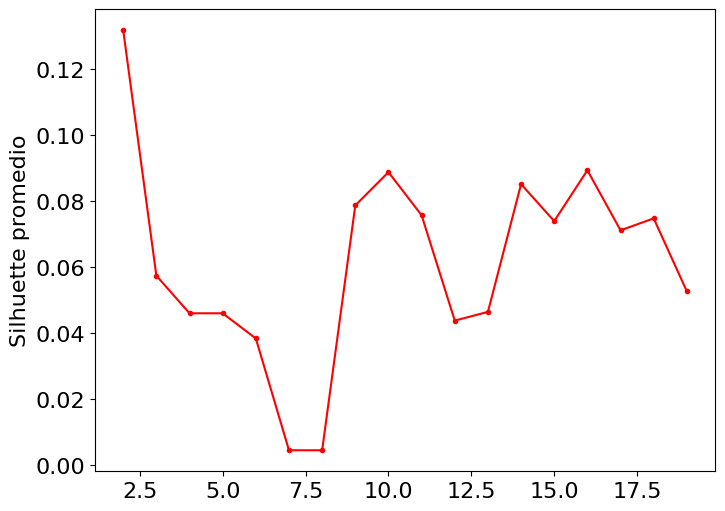

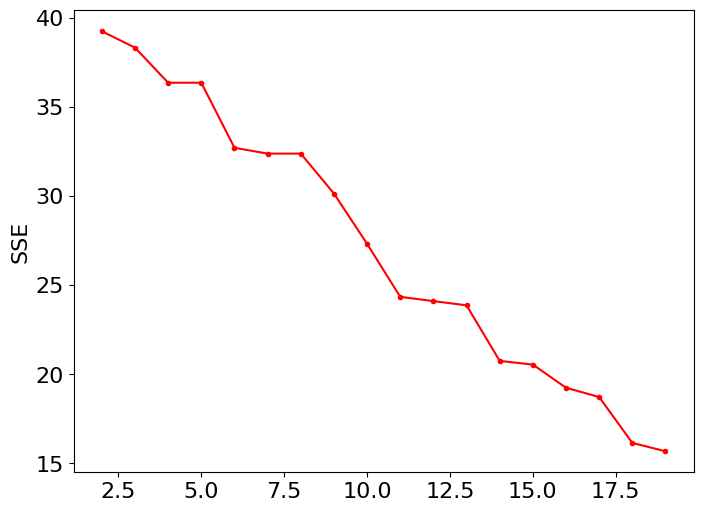

In [ ]:
range_k = [i for i in range(2,20)]
silh = []
sse = []
for k in range_k:
#    KM_meta = KMedoids(n_clusters=k,metric='precomputed',init='k-medoids++').fit(d_meta)
    KM_meta = KMedoids(n_clusters = k, metric = 'precomputed', init = 'heuristic').fit(d_meta)

    silh.append(silhouette_score(d_meta, KM_meta.labels_, metric = 'precomputed'))
    sse.append(calcula_sse_kmedoids(KM_meta, d_meta))

plt.plot(range_k, silh, 'r.-')
plt.ylabel('Silhuette promedio')
plt.show()

plt.plot(range_k, sse, 'r.-')
plt.ylabel('SSE')
plt.show()

#### ¿Cómo se interpretan estos gráficos?
#### ¿Por qué el valor de Silhouette sube, baja a partir de k > 4 y después vuelve a subir gradualmente?
Ayuda: mirar el cluster jerárquico que hicimos antes.

Probamos primero con k=10.

In [ ]:
import matplotlib.cm as cm

def grafica_silhouette(KM,d):
  silhouette_avg = silhouette_score(d, KM.labels_, metric = 'precomputed')
  sample_silhouette_values = silhouette_samples(d, KM.labels_, metric = 'precomputed')

  plt.rcParams['figure.figsize'] = (8,6)
  plt.xlim([-0.1, 1])
  plt.ylim([0, len(KM.labels_) + (k + 1) * 10])

  y_lower = 10
  for i in range(k):
      ith_cluster_silhouette_values = sample_silhouette_values[KM.labels_ == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i) / k)
      plt.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

      plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      y_lower = y_upper + 10

  plt.title(("Silhouette analysis for KMeans clustering on sample data "
                "with k = %d" % k),
                fontsize=14, fontweight='bold')
  plt.xlabel("The silhouette coefficient values")
  plt.ylabel("Cluster label")

  # The vertical line for average silhouette score of all the values
  plt.axvline(x=silhouette_avg, color="red", linestyle="--")

  plt.yticks([])  # Clear the yaxis labels / ticks
  plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
  plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 7 is empty! self.labels_[self.medoid_indices_[7]] may not be labeled with its corresponding cluster (7).
  warnings.warn(


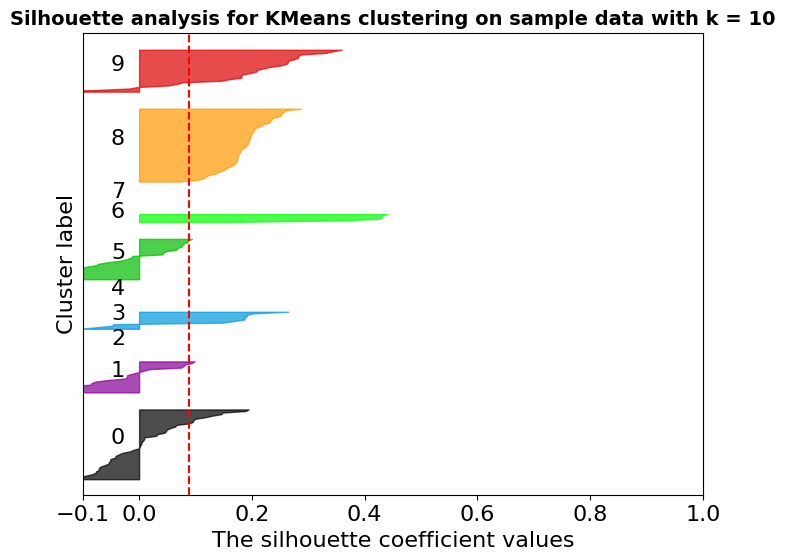

In [ ]:
k = 10
KM_meta = KMedoids(n_clusters=k,metric='precomputed',init='heuristic').fit(d_meta)
grafica_silhouette(KM_meta,d_meta)

([<matplotlib.axis.XTick at 0x7d451da53070>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9')])

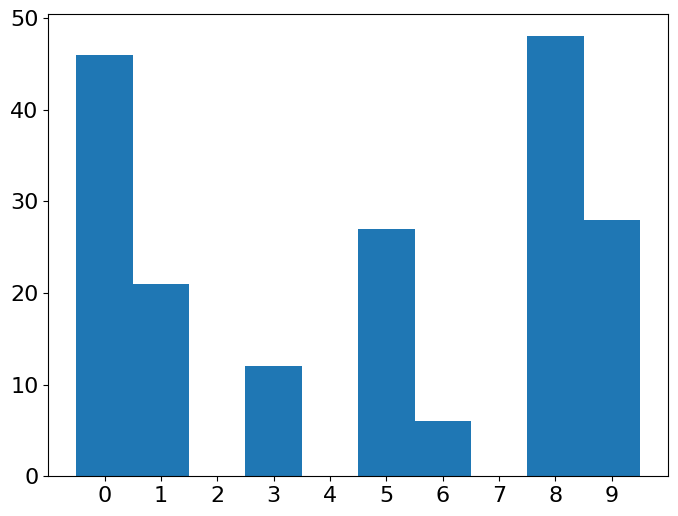

In [ ]:
plt.hist(KM_meta.labels_,bins=k,range=[-0.5,k-0.5])
plt.xticks(np.arange(0,k))

Veamos los valores que toman los prototipos

In [ ]:
meta.iloc[KM_meta.medoid_indices_]

,AGE,GENDER,DOMAIN,PhD,YEARSEXP,OTHERSTATUS
504,46,M,Political_Sciences,Y,20,2
200,41,M,Political_Sciences,Y,15,2
268,41,M,Political_Sciences,Y,15,2
211,42,M,Political_Sciences,Y,18,2
274,42,M,Political_Sciences,Y,18,2
382,34,M,Political_Sciences,Y,12,2
335,42,M,Political_Sciences,Y,14,2
286,42,M,Political_Sciences,Y,14,2
148,43,M,Political_Sciences,N,7,7
178,41,M,Political_Sciences,Y,10,7


Para este ejercicio nos quedamos con k=4, que no es necesariamente el mejor valor.

/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(


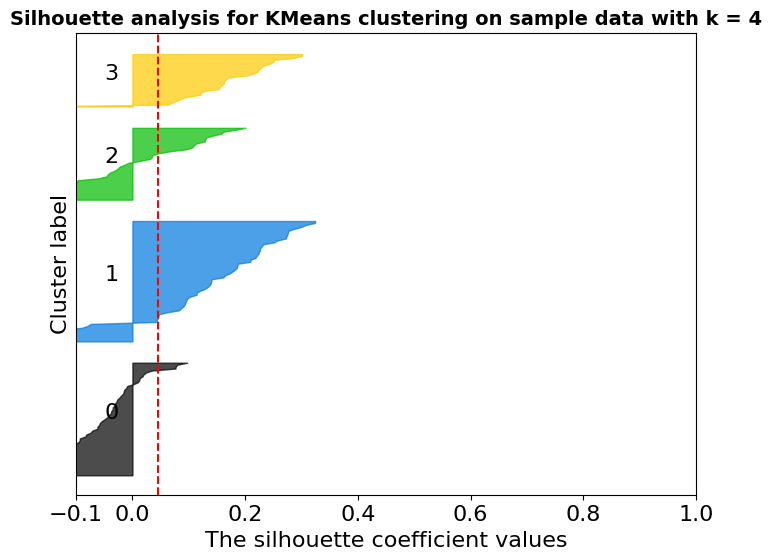

In [ ]:
k = 4
KM_meta = KMedoids(n_clusters=k,metric='precomputed',init='heuristic').fit(d_meta)
grafica_silhouette(KM_meta,d_meta)

In [ ]:
meta.iloc[KM_meta.medoid_indices_]

,AGE,GENDER,DOMAIN,PhD,YEARSEXP,OTHERSTATUS
504,46,M,Political_Sciences,Y,20,2
166,41,M,Political_Sciences,Y,15,7
382,34,M,Political_Sciences,Y,12,2
211,42,M,Political_Sciences,Y,18,2


# Encuestas

## Análisis de las respuestas a las encuestas
Primero realicemos un cluster con el método PAM usando las distancias Euclideas entre respuestas.

In [ ]:
encu.head()

,PU1,PU2,PU3,PEU1,PEU2,ENJ1,ENJ2,Qu1,Qu2,Qu3,...,BI2,Inc1,Inc2,Inc3,Inc4,Exp1,Exp2,Exp3,Exp4,Exp5
148,5,5,5,5,4,5,4,4,4,4,...,4,4,4,4,4,4,5,5,2,4
149,3,2,2,4,4,2,3,3,3,3,...,3,4,4,3,4,2,3,4,1,2
160,2,2,1,4,3,2,3,2,2,2,...,1,1,1,1,1,1,2,3,1,1
164,3,4,4,4,4,5,4,4,3,3,...,3,3,5,3,3,2,3,1,1,1
165,4,4,3,5,5,4,4,3,4,2,...,3,4,4,5,3,4,4,4,2,3


In [ ]:
KM_encu_eucl = KMedoids(n_clusters=5,metric='euclidean',init='heuristic').fit(encu)
KM_encu_eucl.labels_

array([3, 1, 1, 1, 3, 3, 3, 4, 3, 3, 4, 3, 3, 1, 3, 3, 1, 3, 3, 1, 1, 1,
       2, 3, 3, 3, 4, 1, 1, 2, 2, 1, 3, 0, 1, 0, 3, 4, 3, 3, 2, 0, 4, 3,
       4, 3, 1, 3, 0, 1, 1, 1, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 1, 0, 3,
       1, 3, 3, 0, 3, 3, 0, 1, 0, 4, 1, 1, 3, 4, 3, 3, 4, 3, 0, 1, 1, 1,
       4, 4, 3, 1, 0, 3, 0, 3, 1, 2, 1, 3, 1, 0, 1, 3, 3, 0, 0, 1, 1, 1,
       1, 3, 1, 1, 3, 0, 1, 3, 0, 4, 3, 1, 1, 3, 1, 0, 3, 3, 0, 1, 4, 1,
       3, 1, 1, 2, 1, 4, 3, 0, 1, 3, 1, 2, 2, 1, 1, 1, 0, 4, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 2, 3, 1, 1, 3, 3, 3, 1, 1, 1, 1, 3, 1, 3,
       3, 0, 2, 1, 3, 0, 0, 0, 1, 3, 1, 3])

In [ ]:
from sklearn.metrics import pairwise_distances
d_encu_eucl = pairwise_distances(encu, metric='euclidean')
print(calcula_sse_kmedoids(KM_encu_eucl,d_encu_eucl))
print(silhouette_score(encu,KM_encu_eucl.labels_,metric='euclidean'))

8250.0
0.02825456280752423


### Una función de distancia para variables categóricas ordenadas.
Las respuestas están codificadas con cinco valores enteros ordenados. En consecuencia, en lugar de la distancia euclídea, podríamos usar alguna de distancia para variables categóricas ordenadas, como la que vimos en la térocia de medidas de (di)similitud. Para normalizar las distancias entre 0 y 1, vamos a tener en cuenta que el máximo valor de disimilitud es la máxima diferencia entre respuestas, 5-1 = 4. Por ejemplo, para la distancia entre dos encuestados cualquiera:

In [ ]:
nobs = encu.shape[0]
np_encu = encu.to_numpy().astype(float)
norm = encu.shape[1]*( np.amax(np_encu) - 1 ) # numero de columnas * max de disimilitud
d_encu_cat = np.full([nobs,nobs],np.nan)
for i in range(0,nobs):
  for j in range(0,nobs):
    d_encu_cat[i,j] = sum(abs(np_encu[i,:]-np_encu[j,:]))/norm

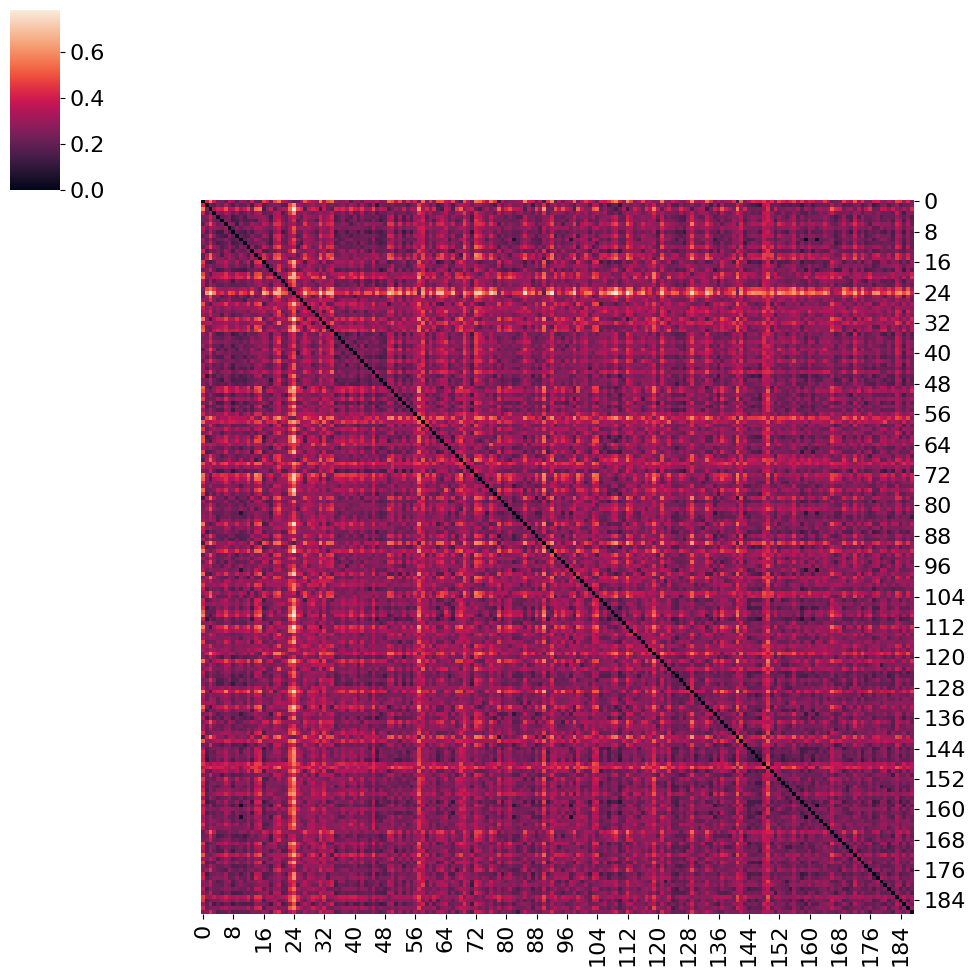

In [ ]:
sns.clustermap(d_encu_cat,row_cluster=False,col_cluster=False)

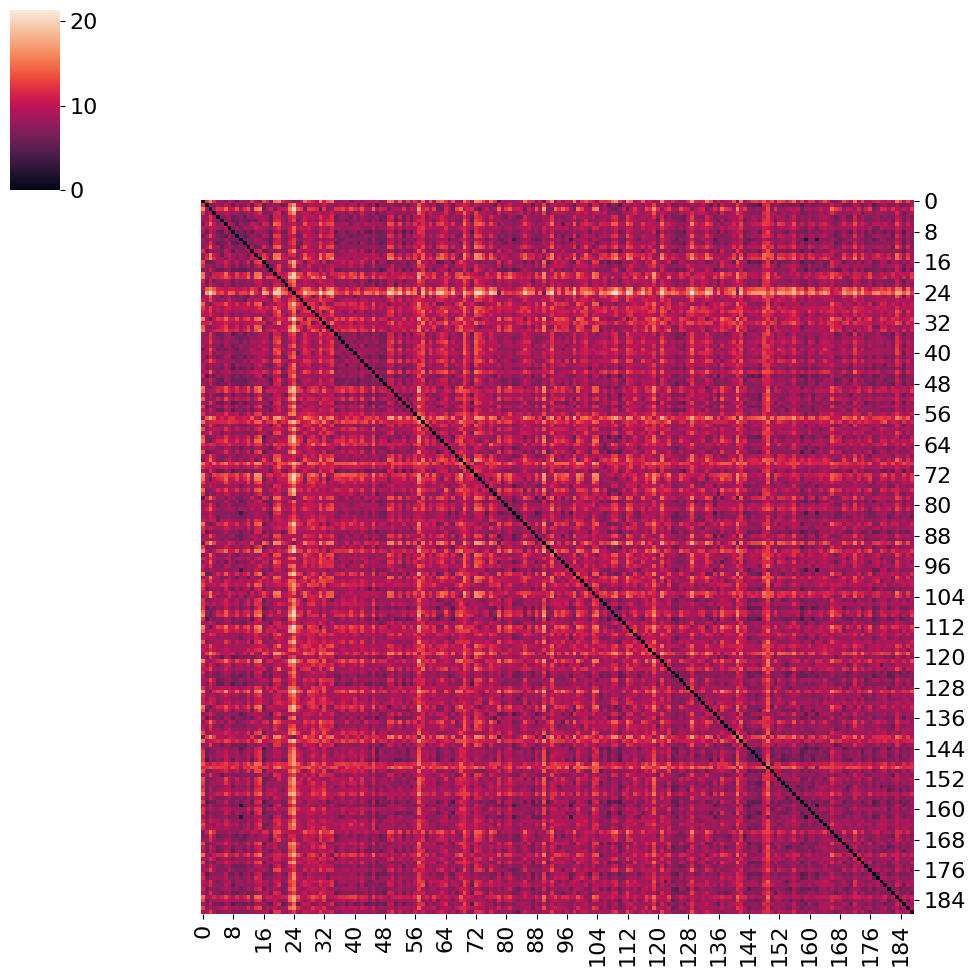

In [ ]:
sns.clustermap(d_encu_eucl,row_cluster=False,col_cluster=False)

In [ ]:
KM_encu_cat = KMedoids(n_clusters=4,metric='precomputed',init='heuristic').fit(d_encu_cat)
print(calcula_sse_kmedoids(KM_encu_cat,d_encu_cat))
print(silhouette_score(d_encu_cat,KM_encu_cat.labels_,metric='precomputed'))

6.786213563355145
0.07528688099886055


In [ ]:
tmp = pd.DataFrame({'Meta': KM_meta.labels_, 'Encu': KM_encu_cat.labels_})# Create a DataFrame with labels and varieties as columns: df
ct = pd.crosstab(tmp['Meta'], tmp['Encu']) # Create crosstab: ct
ct

Encu,0,1,2,3
Meta,,,,
0,10,21,21,7
1,9,28,13,13
2,11,13,9,5
3,8,10,8,2


In [ ]:
def vanDongen(ct):
    n2=2*(sum(ct.apply(sum,axis=1)))
    sumi = sum(ct.apply(np.max,axis=1))
    sumj = sum(ct.apply(np.max,axis=0))
    maxsumi = np.max(ct.apply(sum,axis=1))
    maxsumj = np.max(ct.apply(sum,axis=0))
    vd = (n2 - sumi - sumj)/(n2 - maxsumi - maxsumj)
    return vd

In [ ]:
print(vanDongen(ct))

0.9585062240663901


In [ ]:
from sklearn.metrics import adjusted_rand_score
print(adjusted_rand_score(KM_meta.labels_, KM_encu_cat.labels_))

0.0052467879062613465
